In [156]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import *
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings( "ignore" )

In [116]:
df=pd.read_csv('data.csv')

In [117]:
df.head(8)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN


In [118]:
df.isna().sum() # finds the sum of colomuns with missing val
df=df.dropna(axis=1) # drops the last col with empty val
df.shape

(569, 32)

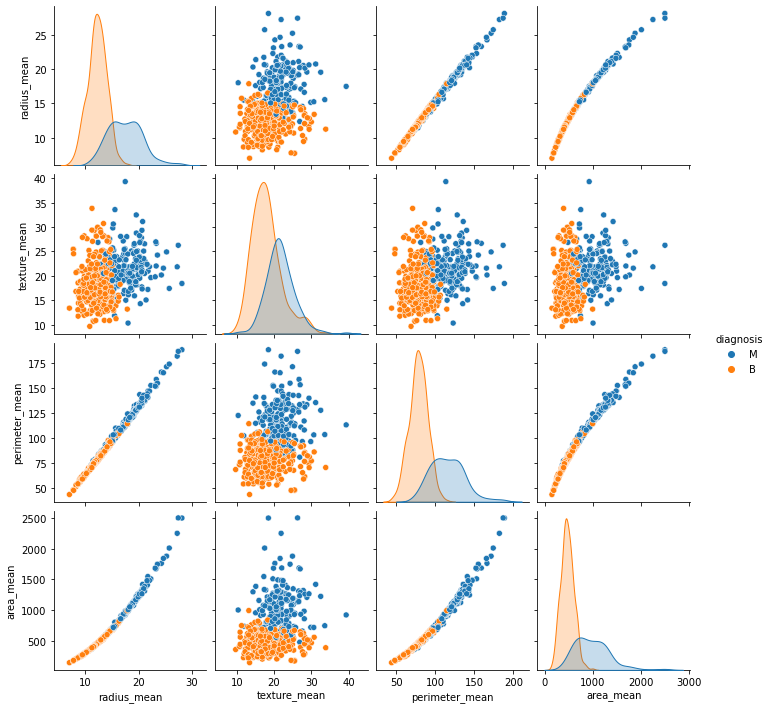

In [119]:
diag=sb.pairplot(df.iloc[:,1:6],hue='diagnosis')
diag.savefig("diag.png")

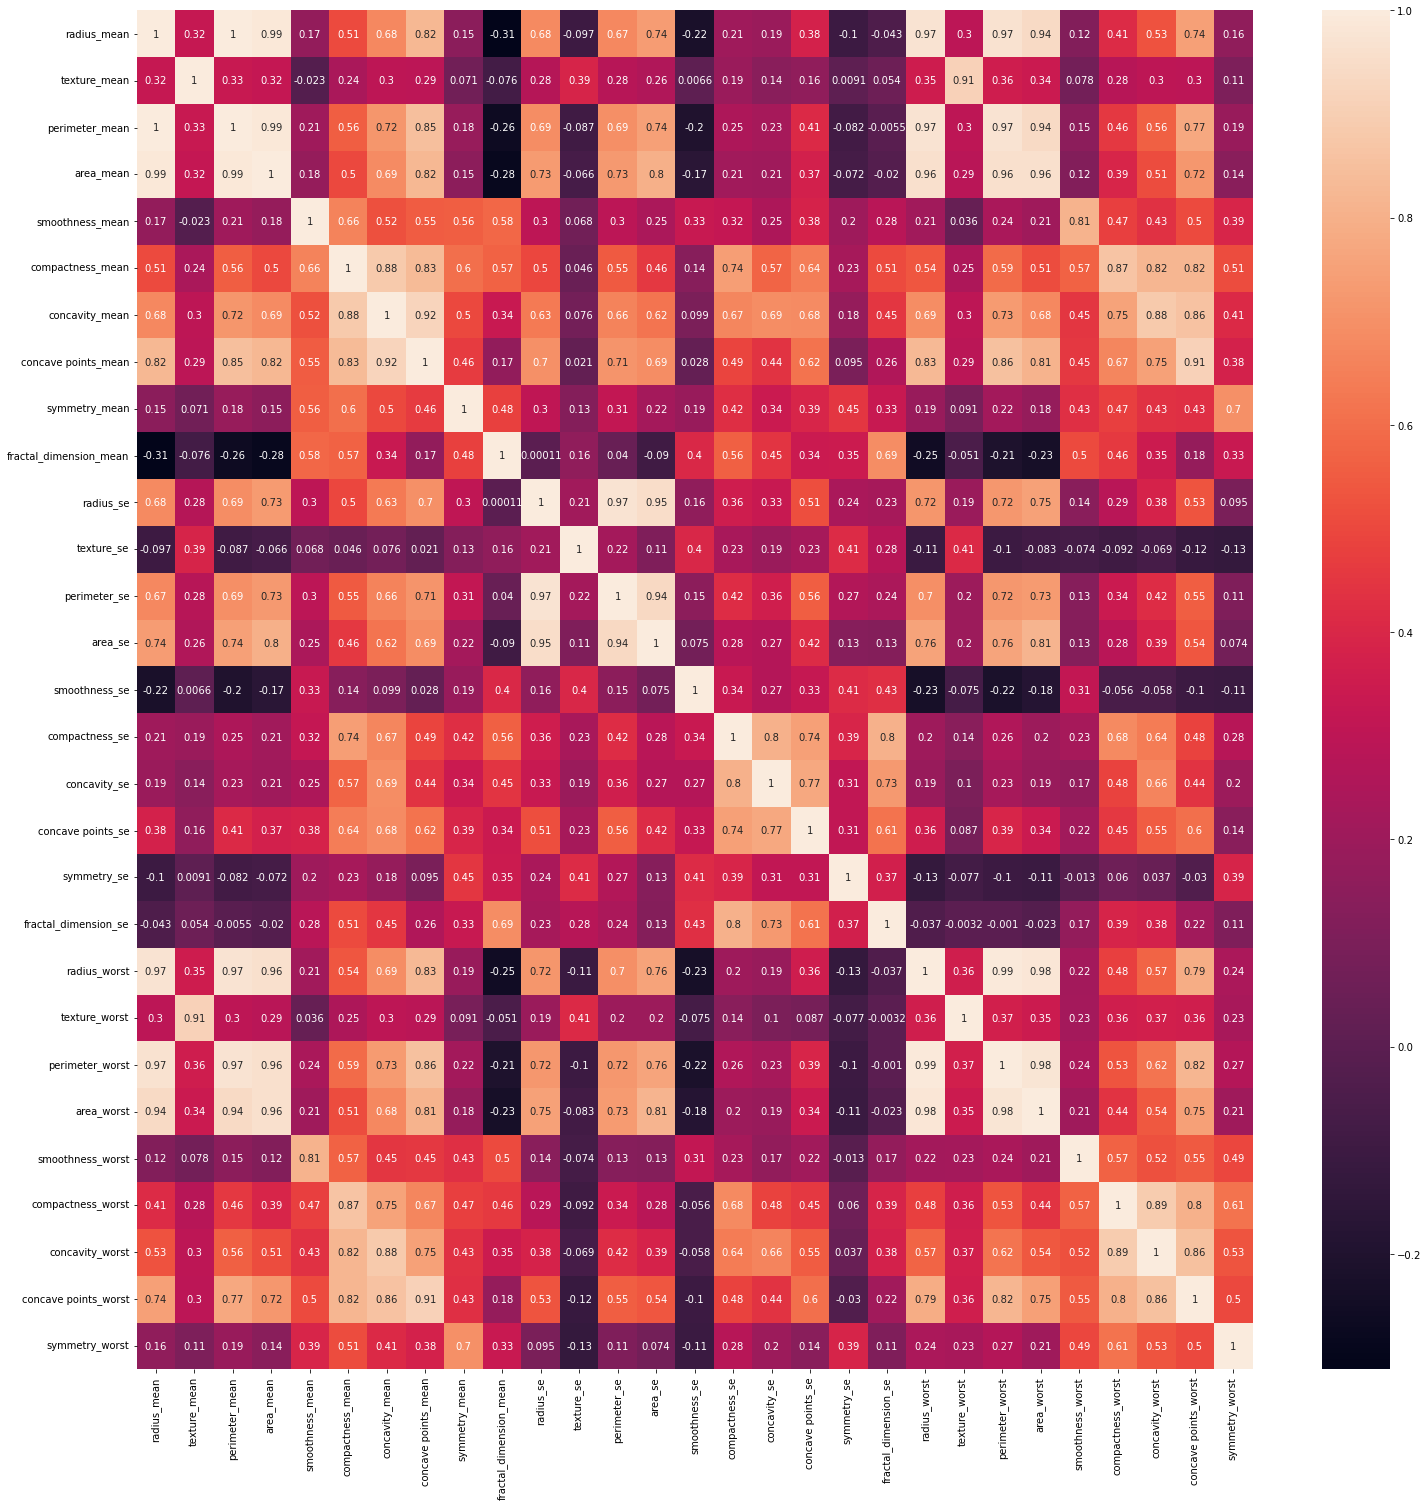

In [120]:
x=df.iloc[:,1:31].corr()
plt.figure(figsize=(25,25))
xx=sb.heatmap(x,annot=True)
figure = xx.get_figure()    
figure.savefig('features.png')

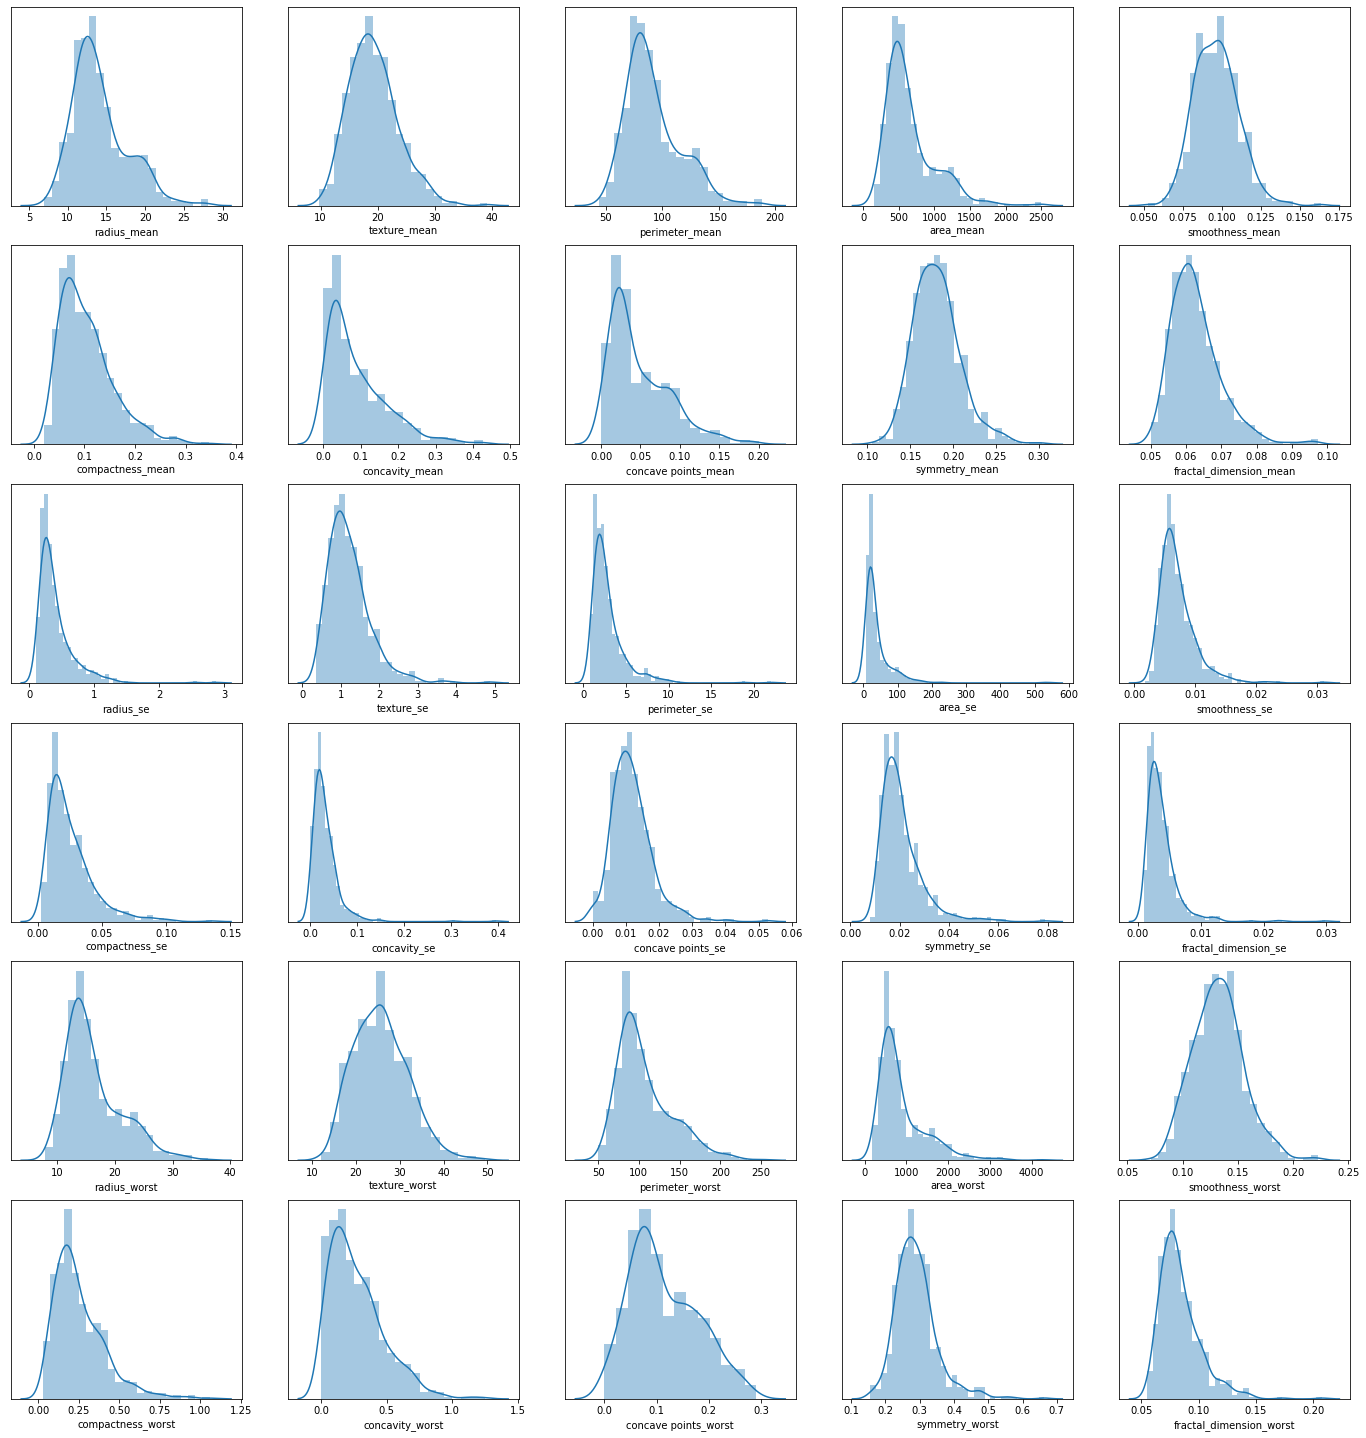

In [121]:
plt.figure(figsize=[24,30])
for i,feature in enumerate(df.iloc[:,2:]):
    plt.subplot(7,5,i+1)
    sb.distplot(df[feature])
    plt.yticks([])
    plt.ylabel('')
    plt.savefig("Out.png")
plt.show()

In [177]:
class LDA:
    
    # Compare LDA with my PCA graph and see what is the difference between two
    # number_of_important_feature is the component axes in mathematical terms
    def __init__(self, number_of_important_features=29):
        self.number_of_important_features=number_of_important_features
        self.LDs=None
    
    def fit(self, X,y):
        feature_count=X.shape[1]
        # Getting unique classes in y
        type_of_class_in_y=np.unique(y)
        # Calculating mean of all samples
        mean_all=np.mean(X,axis=0)
        # Initialising with zeros these below matrix
        separation_within_class=np.zeros((feature_count,feature_count))
        separation_between_class=np.zeros((feature_count,feature_count))
        # Iterating over each type of unique classes of y
        for c in type_of_class_in_y:
            X_of_each_class=X[y==c]
            # Calculating the mean of each unique class
            mean_of_each_class=np.mean(X_of_each_class,axis=0)
            # Calculating separation within class(squared) and summing over it
            separation_within_class=separation_within_class+np.dot((X_of_each_class-mean_of_each_class).T,(X_of_each_class-mean_of_each_class))
            # Calculating difference between mean of each class with mean of overall samples
            mean_difference_with_overall_mean=(mean_of_each_class-mean_all).reshape(feature_count,1)
            # Calculating and summing over separation between classes
            separation_between_class=separation_between_class+(X.shape[0]*np.dot(mean_difference_with_overall_mean,mean_difference_with_overall_mean.T))
            # calculating these formula (d1(squared)+d2(squared)+d3(squared)..)/s1(squared)+s2(squared)+s3(squared)
            # separation_within_class(inverse)xseparation_between_class==>mat_trans
            mat_trans=np.dot(np.linalg.inv(separation_within_class),separation_between_class)
            # Same as PCA 
            # Refer to PCA for explanation and dimensions
            # Link https://www.kaggle.com/ankan1998/pca-from-scratch
            # Details on Eigenvectors
            # For more resources visit https://www.kaggle.com/getting-started/176613
            eigenvalues,eigenvector=np.linalg.eig(mat_trans)
            eigenvector=eigenvector.T
            indexs=np.argsort(eigenvalues)[::-1]
            eigenvector=eigenvector[indexs]
            eigenvalues=eigenvalues[indexs]
            self.LDs=eigenvector[:self.number_of_important_features]
            print(indexs)
            
    def apply(self,X):
        # Projecting on New Axis
        return np.dot(X,self.LDs.T)
    

In [178]:
def trainData_testData_split(X, y, testPercentage, seed=1121):
    np.random.seed(seed)
    randomArray = np.random.rand(X.shape[0])
    splittedData = randomArray < np.percentile(randomArray, int((1 - testPercentage)*100))

    X_train = X[splittedData]
    y_train = y[splittedData]
    X_test  = X[~splittedData]
    y_test  = y[~splittedData]
    
    return X_train, X_test, y_train, y_test

In [179]:
df=pd.read_csv('data.csv')
df.isna().sum() # finds the sum of colomuns with missing val
df=df.dropna(axis=1) # drops the last col with empty val

In [180]:
labelencoder_Y= LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1]
    #splitting the data the into independent x a nd y data sets
X=df.iloc[:,2:31].values
Y=df.iloc[:,1].values
X_train,X_test,Y_train,Y_test=trainData_testData_split(X,Y,0.25)

print(len(X_train))
len(Y_train)

426


426

In [181]:
class StandardScalers(object):
    def __init__(self):
        pass

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X - self.mean_, axis=0)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transforms(self, X):
        return self.fit(X).transform(X)
sc = StandardScalers()
X_train=sc.fit_transforms(X_train)
print(len(X_train))

426


In [182]:
lda=LDA(29)


In [183]:
lda.fit(X_train,Y_train)

[ 0  1  4  5  7  8 14  9 10 19 20 21 25 26 27 28 15 16 22 23 24 18 17 12
 13 11  6  2  3]
[ 0  4  7 13  9 10 16 17 24 25 28 26 27 14 15 23 22 21  5  6 18 19 20 11
 12  8  3  2  1]


In [184]:
projected=lda.apply(X_test)
print(projected)
type(projected)

[[ 258.94852585+0.j  473.78623674+0.j -101.85003003+0.j ...
   330.33277064+0.j   40.4277916 +0.j -169.8497327 +0.j]
 [ 204.02267266+0.j  386.13932733+0.j  -56.27462765+0.j ...
   264.02771536+0.j   42.49199573+0.j -130.58215031+0.j]
 [ 199.57300383+0.j  368.28784612+0.j  -68.26636115+0.j ...
   260.03251059+0.j   40.33578101+0.j -127.84044557+0.j]
 ...
 [  92.37291296+0.j  188.6543971 +0.j   -7.5008464 +0.j ...
   124.32515158+0.j   32.68956241+0.j  -55.12101307+0.j]
 [  98.46337406+0.j  215.2674538 +0.j   13.31408115+0.j ...
   137.78274103+0.j   37.32850337+0.j  -58.3111202 +0.j]
 [ 176.91690592+0.j  386.36876733+0.j   28.61286124+0.j ...
   246.78974465+0.j   50.65369822+0.j -110.09076035+0.j]]


numpy.ndarray

<AxesSubplot:>

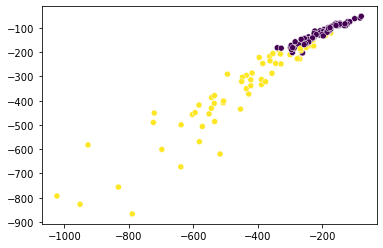

In [204]:
x0=projected[:,3]
x1=projected[:,23]
sb.scatterplot(x1, x0,c=Y_test)


In [150]:
len(x0)


143

In [141]:
len(x1)

143